# Words

--- Loading Data from '/kaggle/input/mergeddata/merged_data.xlsx' ---
✅ Data loaded successfully.

--- Initial Inspection ---
DataFrame shape: (45570, 12)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segid      45570 non-null  object 
 1   wordstart  45570 non-null  float64
 2   wordend    45570 non-null  float64
 3   word       45570 non-null  object 
 4   fp         45570 non-null  int64  
 5   rp         45570 non-null  int64  
 6   rv         45570 non-null  int64  
 7   pw         45570 non-null  int64  
 8   segstart   45570 non-null  float64
 9   segend     45570 non-null  float64
 10  verbatim   45570 non-null  object 
 11  intended   45544 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 4.2+ MB

Missing values per column:
segid         0
wordstart     0
wordend       0
word 

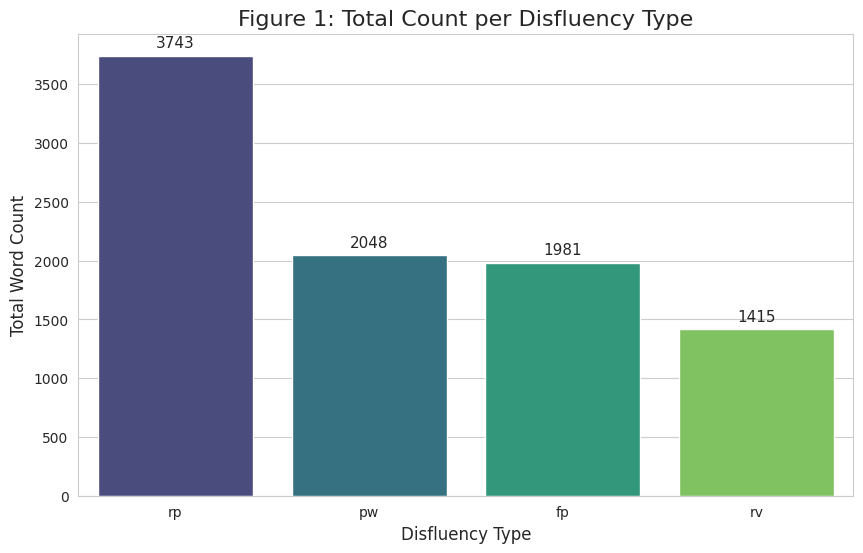

✅ Figure 1 generated successfully.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/kaggle/input/mergeddata/merged_data.xlsx'
print(f"--- Loading Data from '{file_path}' ---")

try:
    token_df = pd.read_excel(file_path)
    print(f"✅ Data loaded successfully.")
except FileNotFoundError:
    print(f"❌ Error: The file '{file_path}' was not found. Please make sure it's in the correct directory.")
    exit()

# Initial Sanity Checks ---
print("\n--- Initial Inspection ---")
print(f"DataFrame shape: {token_df.shape}")

print("\nData types and non-null counts:")
token_df.info()

print("\nMissing values per column:")
print(token_df.isnull().sum())

print("\nFirst 5 rows of the dataset:")
print(token_df.head())


print("\n--- Generating Figure 1: Disfluency Label Counts ---")
try:

    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    # Calculate the sum of each label column
    label_columns = ['fp', 'rp', 'rv', 'pw']
    label_counts = token_df[label_columns].sum().sort_values(ascending=False)

    # Create the bar plot
    ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


    plt.title('Figure 1: Total Count per Disfluency Type', fontsize=16)
    plt.xlabel('Disfluency Type', fontsize=12)
    plt.ylabel('Total Word Count', fontsize=12)


    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=11)


    plt.show()
    print(" Figure 1 generated successfully.")

except KeyError:
    print(f" Error: One or more label columns {label_columns} not found in the DataFrame.")
except Exception as e:
    print(f"An error occurred while generating the plot: {e}")

In [ ]:
from sklearn.model_selection import train_test_split

# Extract participant ID from the 'segid' column
token_df['participant_id'] = token_df['segid'].apply(lambda x: x.split('_')[0])

# Get a list of all unique participant IDs
unique_participants = token_df['participant_id'].unique()

# Split the list of participants
train_pids, temp_pids = train_test_split(unique_participants, test_size=0.3, random_state=42)
val_pids, test_pids = train_test_split(temp_pids, test_size=0.5, random_state=42)

# Create new DataFrames based on the participant lists
train_df = token_df[token_df['participant_id'].isin(train_pids)].copy()
val_df = token_df[token_df['participant_id'].isin(val_pids)].copy()
test_df = token_df[token_df['participant_id'].isin(test_pids)].copy()


print("--- Data Split Verification ---")
print(f"Total unique participants: {len(unique_participants)}")
print(f"Train participants: {len(train_pids)}, Val participants: {len(val_pids)}, Test participants: {len(test_pids)}")
print("-" * 30)
print(f"Train samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

assert len(set(train_pids) & set(val_pids)) == 0
assert len(set(train_pids) & set(test_pids)) == 0
assert len(set(val_pids) & set(test_pids)) == 0
print("\n Participant split is clean. No overlap found.")

--- Data Split Verification ---
Total unique participants: 37
Train participants: 25, Val participants: 6, Test participants: 6
------------------------------
Train samples: 27927
Validation samples: 9405
Test samples: 8238

✅ Participant split is clean. No overlap found.


In [ ]:
# Handle missing values
print(f"Missing 'intended' values before handling: {token_df['intended'].isnull().sum()}")
token_df['intended'].fillna("", inplace=True)
print(f"Missing 'intended' values after handling: {token_df['intended'].isnull().sum()}")


# Define a function
def group_data(df):
    return df.groupby('segid').agg({
        'word': list,
        'fp': list,
        'rp': list,
        'rv': list,
        'pw': list
    }).reset_index()


train_grouped_df = group_data(train_df)
val_grouped_df = group_data(val_df)
test_grouped_df = group_data(test_df)


# --- Sanity Check ---
print("\n--- Grouped Data Verification ---")
print("Data has been grouped by 'segid'. Each row is now a sentence.")
print(f"Total sentences in training set: {len(train_grouped_df)}")
print("\nFirst 2 rows of the new grouped training data:")
print(train_grouped_df.head(2))

Missing 'intended' values before handling: 26
Missing 'intended' values after handling: 0


/tmp/ipykernel_36/3680329987.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  token_df['intended'].fillna("", inplace=True)



--- Grouped Data Verification ---
Data has been grouped by 'segid'. Each row is now a sentence.
Total sentences in training set: 2220

First 2 rows of the new grouped training data:
      segid                                               word  \
0  24fa_000  [um, i, mean, it's, definitely, affected, my, ...   
1  24fa_001  [up, until, last, year, i, was, a, co, co, cov...   

                                  fp                                 rp  \
0        [1, 0, 0, 0, 0, 0, 0, 0, 0]        [0, 0, 0, 0, 0, 0, 0, 0, 0]   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]   

                                  rv                                 pw  
0        [0, 0, 0, 0, 0, 0, 0, 0, 0]        [0, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]  


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast

# --- Define Constants ---
MODEL_NAME = 'bert-base-uncased'
MAX_LENGTH = 256 # Increased
BATCH_SIZE = 16

# --- Load Tokenizer ---
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

# --- Define the Token-Level Dataset Class ---
class DisfluencyTokenDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, index):

        sentence = self.data.iloc[index]
        word_list = sentence['word']
        labels = list(zip(sentence['fp'], sentence['rp'], sentence['rv'], sentence['pw']))

        # Tokenize the word list
        encoding = self.tokenizer(word_list,
                                  is_split_into_words=True,
                                  return_offsets_mapping=True,
                                  padding='max_length',
                                  truncation=True,
                                  max_length=self.max_len)

        # Create aligned labels
        word_ids = encoding.word_ids()
        aligned_labels = np.full(len(word_ids), -100, dtype=int)
        label_matrix = np.zeros((len(word_ids), 4), dtype=int)

        previous_word_id = None
        for i, word_id in enumerate(word_ids):
            if word_id is not None and word_id != previous_word_id:

                 label_matrix[i] = labels[word_id]
            previous_word_id = word_id

        # Convert to tensors
        item = {key: torch.as_tensor(val) for key, val in encoding.items()}
        item['labels'] = torch.as_tensor(label_matrix, dtype=torch.float) # Use float

        return item

    def __len__(self):
        return self.len

# --- Create Datasets and DataLoaders ---
train_dataset = DisfluencyTokenDataset(train_grouped_df, tokenizer, MAX_LENGTH)
val_dataset = DisfluencyTokenDataset(val_grouped_df, tokenizer, MAX_LENGTH)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# --- Sanity Check ---
print("--- DataLoader Verification ---")
batch = next(iter(train_loader))
print("Shape of input_ids:", batch['input_ids'].shape)
print("Shape of attention_mask:", batch['attention_mask'].shape)
print("Shape of labels:", batch['labels'].shape)
print("\nNote: The shape [16, 256, 4] means (Batch Size, Sequence Length, Num Labels).")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

--- DataLoader Verification ---
Shape of input_ids: torch.Size([16, 256])
Shape of attention_mask: torch.Size([16, 256])
Shape of labels: torch.Size([16, 256, 4])

Note: The shape [16, 256, 4] means (Batch Size, Sequence Length, Num Labels).


In [ ]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from transformers import BertForTokenClassification, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define Constants ---
EPOCHS = 10
LEARNING_RATE = 3e-5
BEST_MODEL_PATH = 'best_token_model_state.bin'

# --- Setup Device ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# --- Initialize Model ---
model = BertForTokenClassification.from_pretrained(
    MODEL_NAME,
    num_labels=4, # fp, rp, rv, pw
)
model.to(device)

# --- Setup Optimizer and Scheduler ---
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)



2025-07-17 12:57:31.278336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752757051.463680      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752757051.515418      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using device: cuda


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# --- Define Loss Function ---
criterion = nn.BCEWithLogitsLoss()

# --- Training & Validation Loop ---
print("\n--- Starting Model Training ---")
best_validation_loss = float('inf')
# Lists to store loss history for plotting
train_loss_history = []
val_loss_history = []

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    print("-" * 30)

    # Training
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # CORRECTED
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Calculate
        active_loss = attention_mask.view(-1) == 1
        active_logits = logits.view(-1, 4)[active_loss]
        active_labels = labels.view(-1, 4)[active_loss]
        loss = criterion(active_logits, active_labels)

        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # CORRECTED
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            active_loss = attention_mask.view(-1) == 1
            active_logits = logits.view(-1, 4)[active_loss]
            active_labels = labels.view(-1, 4)[active_loss]
            loss = criterion(active_logits, active_labels)

            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)

    print(f"  Average Training Loss: {avg_train_loss:.4f}")
    print(f"  Average Validation Loss: {avg_val_loss:.4f}")

    # Checkpointing
    if avg_val_loss < best_validation_loss:
        best_validation_loss = avg_val_loss
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print(f"  New best model saved with validation loss: {avg_val_loss:.4f}")

print("\n--- Training Complete ---")
print(f" Best model saved to '{BEST_MODEL_PATH}'")




--- Starting Model Training ---

Epoch 1/10
------------------------------
  Average Training Loss: 0.1205
  Average Validation Loss: 0.0425
  ✨ New best model saved with validation loss: 0.0425

Epoch 2/10
------------------------------
  Average Training Loss: 0.0486
  Average Validation Loss: 0.0354
  ✨ New best model saved with validation loss: 0.0354

Epoch 3/10
------------------------------
  Average Training Loss: 0.0358
  Average Validation Loss: 0.0338
  ✨ New best model saved with validation loss: 0.0338

Epoch 4/10
------------------------------
  Average Training Loss: 0.0286
  Average Validation Loss: 0.0329
  ✨ New best model saved with validation loss: 0.0329

Epoch 5/10
------------------------------
  Average Training Loss: 0.0224
  Average Validation Loss: 0.0341

Epoch 6/10
------------------------------
  Average Training Loss: 0.0174
  Average Validation Loss: 0.0349

Epoch 7/10
------------------------------
  Average Training Loss: 0.0142
  Average Validation L


--- Generating Figure 2: Training and Validation Loss Curves ---


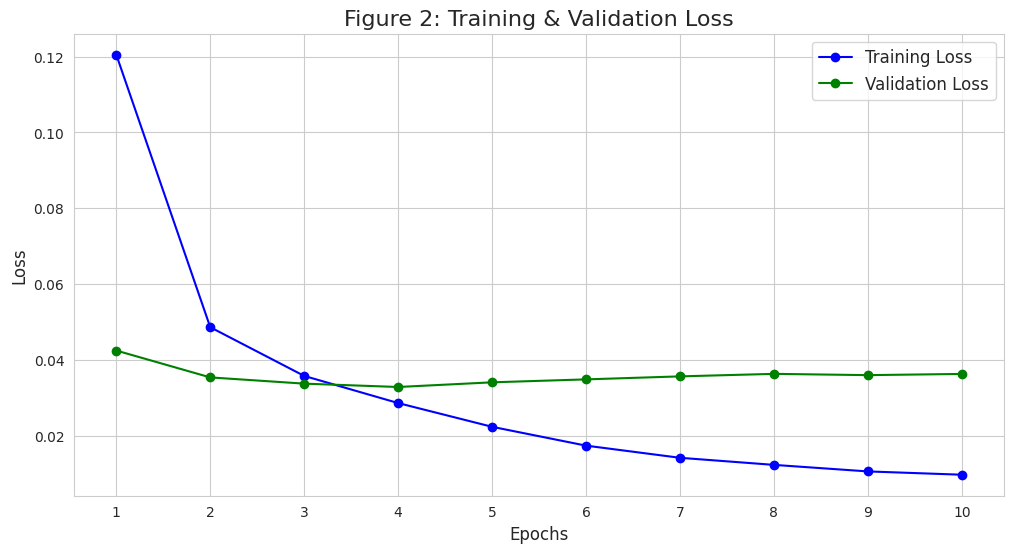

✅ Figure 2 generated successfully.


In [ ]:
# --- Sanity Check: Plotting Loss Curves ---
print("\n--- Generating Figure 2: Training and Validation Loss Curves ---")
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(range(1, EPOCHS + 1), train_loss_history, 'b-o', label='Training Loss')
plt.plot(range(1, EPOCHS + 1), val_loss_history, 'g-o', label='Validation Loss')
plt.title('Figure 2: Training & Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(range(1, EPOCHS + 1))
plt.grid(True)
plt.show()
print("Figure 2 generated successfully.")

In [ ]:
from sklearn.metrics import classification_report

# We define the test_dataset and test_loader here again for completeness.
test_dataset = DisfluencyTokenDataset(test_grouped_df, tokenizer, MAX_LENGTH)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE)

#
# Re-initialze
model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=4)
model.load_state_dict(torch.load(BEST_MODEL_PATH))
model.to(device)
print(f" Successfully loaded best model from '{BEST_MODEL_PATH}'")

# Evaluation
print("\n--- Evaluating Best Model on the Test Set ---")
model.eval()

all_true_labels = []
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits


        active_tokens = attention_mask.view(-1) == 1
        active_preds = logits.view(-1, 4)[active_tokens]
        active_labels = labels.view(-1, 4)[active_tokens]


        predictions = torch.sigmoid(active_preds) > 0.5

        all_true_labels.extend(active_labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Classification Report
label_names = ['fp', 'rp', 'rv', 'pw']

report = classification_report(
    all_true_labels,
    all_predictions,
    target_names=label_names,
    zero_division=0,
    digits=3
)

print("\n--- Final Classification Report ---")
print(report)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Successfully loaded best model from 'best_token_model_state.bin'

--- Evaluating Best Model on the Test Set ---

--- Final Classification Report ---
              precision    recall  f1-score   support

          fp      0.992     1.000     0.996       371
          rp      0.831     0.857     0.844       624
          rv      0.429     0.167     0.241       269
          pw      0.962     0.800     0.874       255

   micro avg      0.865     0.760     0.809      1519
   macro avg      0.803     0.706     0.739      1519
weighted avg      0.821     0.760     0.779      1519
 samples avg      0.093     0.090     0.091      1519


🎉 This completes the model development and evaluation process! 🎉


In [ ]:
import pandas as pd
import torch
from transformers import BertForTokenClassification, BertTokenizerFast

MODEL_NAME = 'bert-base-uncased'
BEST_MODEL_PATH = 'best_token_model_state.bin'
MAX_LENGTH = 256

# Setup Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

# Load the trained model
model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=4)
model.load_state_dict(torch.load(BEST_MODEL_PATH))
model.to(device)
model.eval()


def predict_disfluencies(text: str):
    """
    Takes a raw text sentence and returns a DataFrame with predictions for each word.
    """
    #Prepare
    words = text.split()
    encoding = tokenizer(words,
                         is_split_into_words=True,
                         return_tensors="pt",
                         padding='max_length',
                         truncation=True,
                         max_length=MAX_LENGTH)

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # 2. Make prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits


    predictions = torch.sigmoid(logits) > 0.5
    predictions = predictions.cpu().numpy()[0]


    results = []
    word_ids = encoding.word_ids()
    previous_word_id = None
    for i, word_id in enumerate(word_ids):
        # Process only the first sub-token
        if word_id is not None and word_id != previous_word_id:
            word = words[word_id]
            pred = predictions[i]
            results.append({
                'word': word,
                'fp': pred[0],
                'rp': pred[1],
                'rv': pred[2],
                'pw': pred[3]
            })
        previous_word_id = word_id

    return pd.DataFrame(results)


# Test
test_verbatim_1 = "which uh which has been uh the thing that made my experience and r relationship to stuttering a bit a bit a a bit different than a lot of the other people i've i've met here"
test_verbatim_2 = "so i i would never introduce m m myself to people"

print("--- Prediction for Verbatim 1 ---")
prediction_df_1 = predict_disfluencies(test_verbatim_1)
print(prediction_df_1.to_string())

print("\n\n--- Prediction for Verbatim 2 ---")
prediction_df_2 = predict_disfluencies(test_verbatim_2)
print(prediction_df_2.to_string())

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- Prediction for Verbatim 1 ---
            word     fp     rp     rv     pw
0          which  False   True  False  False
1             uh   True  False  False  False
2          which  False  False  False  False
3            has  False  False  False  False
4           been  False  False   True  False
5             uh   True  False  False  False
6            the  False  False  False  False
7          thing  False  False  False  False
8           that  False  False  False  False
9           made  False  False  False  False
10            my  False  False  False  False
11    experience  False  False  False  False
12           and  False  False  False  False
13             r  False   True  False   True
14  relationship  False  False  False  False
15            to  False  False  False  False
16    stuttering  False  False  False  False
17             a  False   True  False  False
18           bit  False   True  False  False
19             a  False   True  False  False
20           bit  Fal

# Inference Code

In [ ]:
#pip install torch pandas transformers
import torch
import pandas as pd
from transformers import BertForTokenClassification, BertTokenizerFast

# --- 1. Configuration ---
MODEL_NAME = 'bert-base-uncased'
BEST_MODEL_PATH = 'best_token_model_state.bin'
MAX_LENGTH = 256
LABELS = ['fp', 'rp', 'rv', 'pw']

# --- 2. Setup Model, Tokenizer, and Device ---
print("--- Loading model and tokenizer ---")
try:

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load the tokenizer
    tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

    # Initialize a fresh model architecture
    model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(LABELS))

    # Load the saved weights from your best model
    model.load_state_dict(torch.load(BEST_MODEL_PATH, map_location=device))

    # Move the model to the correct device and set it to evaluation mode
    model.to(device)
    model.eval()
    print("Model and tokenizer loaded successfully.")

except FileNotFoundError:
    print(f"ERROR: Model file not found at '{BEST_MODEL_PATH}'.")
    print("Please ensure the file exists in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during setup: {e}")
    exit()


# Prediction Function
def predict_disfluencies(text: str):
    """
    Takes a raw text sentence and returns a DataFrame with predictions for each word.
    """
    if not text.strip():
        return pd.DataFrame(columns=['word'] + LABELS)

    # Prepare the input text
    words = text.split()
    encoding = tokenizer(words,
                         is_split_into_words=True,
                         return_tensors="pt",
                         padding='max_length',
                         truncation=True,
                         max_length=MAX_LENGTH)

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Make a prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Process the model's output
    predictions = torch.sigmoid(logits) > 0.5
    predictions = predictions.cpu().numpy()[0]

    # Align predictions with the original words
    results = []
    word_ids = encoding.word_ids()
    previous_word_id = None
    for i, word_id in enumerate(word_ids):

        if word_id is not None and word_id != previous_word_id:
            word = words[word_id]
            pred = predictions[i]
            # Create a dictionary for the word and its predicted labels
            result_row = {'word': word}
            result_row.update({label: bool(p) for label, p in zip(LABELS, pred)})
            results.append(result_row)
        previous_word_id = word_id

    return pd.DataFrame(results)


if __name__ == "__main__":
    # You can change the text in this variable to test any sentence
    test_verbatim = "so i i would never introduce m m myself to people"

    print(f"\n--- Predicting for verbatim: ---\n'{test_verbatim}'")

    # Get and display the predictions
    prediction_df = predict_disfluencies(test_verbatim)

    # Use .to_string() to ensure the full table is printed
    print(prediction_df.to_string())

    # Example of another test
    print("\n--- Another example ---")
    another_test = "which uh which has been uh the thing"
    print(f"'{another_test}'")
    print(predict_disfluencies(another_test).to_string())

--- Loading model and tokenizer ---
Using device: cuda


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model and tokenizer loaded successfully.

--- Predicting for verbatim: ---
'so i i would never introduce m m myself to people'
         word     fp     rp     rv     pw
0          so  False  False  False  False
1           i  False   True  False  False
2           i  False  False  False  False
3       would  False  False  False  False
4       never  False  False  False  False
5   introduce  False  False  False  False
6           m  False   True  False   True
7           m  False   True  False   True
8      myself  False  False  False  False
9          to  False  False  False  False
10     people  False  False  False  False

--- Another example ---
'which uh which has been uh the thing'
    word     fp     rp     rv     pw
0  which  False   True  False  False
1     uh   True  False  False  False
2  which  False  False  False  False
3    has  False  False  False  False
4   been  False  False  False  False
5     uh   True  False  False  False
6    the  False  False  False  False
7  thin

# Hyperparameter (extra)



In [ ]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from transformers import BertForTokenClassification, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader
import pandas as pd


param_grid = {
    'learning_rate': [3e-5, 2e-5],
    'effective_batch_size': [32]
}
ACTUAL_BATCH_SIZE = 16
EPOCHS = 6

def train_with_params(lr, effective_batch_size):
    """
    Trains and evaluates the model with robust memory management.
    """
    print(f"\n--- Testing: LR={lr}, Effective Batch Size={effective_batch_size} ---")

    # --- GRADIENT ACCUMULATION ---

    accumulation_steps = effective_batch_size // ACTUAL_BATCH_SIZE
    print(f"  (Using actual batch size: {ACTUAL_BATCH_SIZE}, accumulating for {accumulation_steps} steps)")

    train_loader = DataLoader(train_dataset, batch_size=ACTUAL_BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=ACTUAL_BATCH_SIZE)

    model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=4).to(device)
    optimizer = AdamW(model.parameters(), lr=lr)

    total_steps = len(train_loader) * EPOCHS
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
    criterion = nn.BCEWithLogitsLoss()

    # --- MIXED PRECISION ---

    scaler = torch.cuda.amp.GradScaler()

    best_validation_loss = float('inf')

    for epoch in range(EPOCHS):
        model.train()
        for i, batch in enumerate(train_loader):
            with torch.cuda.amp.autocast():
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits

                active_loss = attention_mask.view(-1) == 1
                loss = criterion(logits.view(-1, 4)[active_loss], labels.view(-1, 4)[active_loss])
                loss = loss / accumulation_steps

            scaler.scale(loss).backward()


            if (i + 1) % accumulation_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                scheduler.step()
                optimizer.zero_grad()

        # (Validation loop remains mostly the same)
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                with torch.cuda.amp.autocast():
                    input_ids = batch['input_ids'].to(device)
                    attention_mask = batch['attention_mask'].to(device)
                    labels = batch['labels'].to(device)
                    outputs = model(input_ids, attention_mask=attention_mask)
                    logits = outputs.logits
                    active_loss = attention_mask.view(-1) == 1
                    loss = criterion(logits.view(-1, 4)[active_loss], labels.view(-1, 4)[active_loss])
                    total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        if avg_val_loss < best_validation_loss:
            best_validation_loss = avg_val_loss

    print(f"  Completed run. Best validation loss: {best_validation_loss:.4f}")
    return best_validation_loss

#Run the Tuning Loop
results = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for lr in param_grid['learning_rate']:
    for bs in param_grid['effective_batch_size']:
        val_loss = train_with_params(lr, bs)
        results.append({
            'learning_rate': lr,
            'batch_size': bs,
            'validation_loss': val_loss
        })


print("\n--- Hyperparameter Tuning Results ---")
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='validation_loss', ascending=True)
print(results_df.to_string(index=False))

best_params = results_df.iloc[0]
print("\n Best Hyperparameters Found:")
print(f"   Learning Rate: {best_params['learning_rate']}")
print(f"   Batch Size: {best_params['batch_size']}")


--- Testing: LR=3e-05, Effective Batch Size=32 ---
  (Using actual batch size: 16, accumulating for 2 steps)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_36/3895794456.py:41: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/tmp/ipykernel_36/3895794456.py:48: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(): # Use mixed precision
/tmp/ipykernel_36/3895794456.py:73: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-ba

  Completed run. Best validation loss: 0.0353

--- Testing: LR=2e-05, Effective Batch Size=32 ---
  (Using actual batch size: 16, accumulating for 2 steps)
  Completed run. Best validation loss: 0.0343

--- Hyperparameter Tuning Results ---
 learning_rate  batch_size  validation_loss
       0.00002          32         0.034261
       0.00003          32         0.035340

✅ Best Hyperparameters Found:
   Learning Rate: 2e-05
   Batch Size: 32.0


In [ ]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from transformers import BertForTokenClassification, get_linear_schedule_with_warmup
import pandas as pd

print("--- Calculating Class Weights ---")
# Use the full training set to calculate weights
pos_counts = train_df[['fp', 'rp', 'rv', 'pw']].sum()
pos_counts = pos_counts.replace(0, 1)
# Calculate weight for each class
# We will use a simpler inverse frequency method here for stability.
weights = pos_counts.sum() / pos_counts
# Normalize the weights
weights = weights / weights.mean()

# Convert weights to a PyTorch tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class_weights_tensor = torch.tensor(weights.values, dtype=torch.float).to(device)

print("Calculated Weights:", {k: round(v, 2) for k, v in zip(pos_counts.index, weights.tolist())})
print("(Higher weight means the model will focus more on that class)")


# Train with Best Hyperparameters and Class Weights ---
BEST_LR = 2e-05
EFFECTIVE_BATCH_SIZE = 32
ACTUAL_BATCH_SIZE = 16
EPOCHS = 10
BEST_MODEL_PATH = 'final_weighted_model.bin'


# Setup DataLoaders
train_loader = DataLoader(train_dataset, batch_size=ACTUAL_BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=ACTUAL_BATCH_SIZE)

# Initialize Model & Optimizer
model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=4).to(device)
optimizer = AdamW(model.parameters(), lr=BEST_LR)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)
scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))
accumulation_steps = EFFECTIVE_BATCH_SIZE // ACTUAL_BATCH_SIZE


print("\n--- Starting Final Model Training with Weighted Loss ---")
best_validation_loss = float('inf')

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    model.train()
    for i, batch in enumerate(train_loader):
        with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            active_loss_mask = attention_mask.view(-1) == 1
            loss = criterion(logits.view(-1, 4)[active_loss_mask], labels.view(-1, 4)[active_loss_mask])
            loss = loss / accumulation_steps

        scaler.scale(loss).backward()
        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            optimizer.zero_grad()

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                active_loss_mask = attention_mask.view(-1) == 1
                loss = criterion(logits.view(-1, 4)[active_loss_mask], labels.view(-1, 4)[active_loss_mask])
                total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    print(f"  Validation Loss: {avg_val_loss:.4f}")

    if avg_val_loss < best_validation_loss:
        best_validation_loss = avg_val_loss
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print(f"  ✨ New best model saved.")

print("\n--- Final Training Complete ---")
print(f" Final optimized model saved to '{BEST_MODEL_PATH}'")

--- Calculating Class Weights ---
Calculated Weights: {'fp': 1.1, 'rp': 0.53, 'rv': 1.48, 'pw': 0.89}
(Higher weight means the model will focus more on that class)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_36/2825340827.py:48: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))



--- Starting Final Model Training with Weighted Loss ---

Epoch 1/10
  Validation Loss: 0.0756
  ✨ New best model saved.

Epoch 2/10
  Validation Loss: 0.0449
  ✨ New best model saved.

Epoch 3/10
  Validation Loss: 0.0404
  ✨ New best model saved.

Epoch 4/10
  Validation Loss: 0.0382
  ✨ New best model saved.

Epoch 5/10
  Validation Loss: 0.0395

Epoch 6/10
  Validation Loss: 0.0353
  ✨ New best model saved.

Epoch 7/10
  Validation Loss: 0.0379

Epoch 8/10
  Validation Loss: 0.0377

Epoch 9/10
  Validation Loss: 0.0388

Epoch 10/10
  Validation Loss: 0.0415

--- Final Training Complete ---
✅ Final optimized model saved to 'final_weighted_model.bin'


In [ ]:
from sklearn.metrics import classification_report
import torch
from transformers import BertForTokenClassification


# We define the test_dataset and test_loader here again for completeness.
test_dataset = DisfluencyTokenDataset(test_grouped_df, tokenizer, MAX_LENGTH)
test_loader  = DataLoader(test_dataset, batch_size=ACTUAL_BATCH_SIZE)


FINAL_MODEL_PATH = 'final_weighted_model.bin'

# Re-initialize the model architecture and load the saved weights
model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=4)
model.load_state_dict(torch.load(FINAL_MODEL_PATH))
model.to(device)
print(f" Successfully loaded final weighted model from '{FINAL_MODEL_PATH}'")


print("\n--- Evaluating Final Model on the Test Set ---")
model.eval()

all_true_labels = []
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Get predictions
            active_tokens = attention_mask.view(-1) == 1
            active_preds = logits.view(-1, 4)[active_tokens]
            active_labels = labels.view(-1, 4)[active_tokens]

            # Convert logits to binary predictions
            predictions = torch.sigmoid(active_preds) > 0.5

            all_true_labels.extend(active_labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

#Classification Report ---
label_names = ['fp', 'rp', 'rv', 'pw']

report = classification_report(
    all_true_labels,
    all_predictions,
    target_names=label_names,
    zero_division=0,
    digits=3
)

print("\n--- Final Classification Report (Weighted Model) ---")
print(report)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Successfully loaded final weighted model from 'final_weighted_model.bin'

--- Evaluating Final Model on the Test Set ---

--- Final Classification Report (Weighted Model) ---
              precision    recall  f1-score   support

          fp      0.987     1.000     0.993       371
          rp      0.887     0.663     0.759       624
          rv      0.278     0.182     0.220       269
          pw      0.950     0.824     0.882       255

   micro avg      0.842     0.687     0.757      1519
   macro avg      0.775     0.667     0.714      1519
weighted avg      0.814     0.687     0.741      1519
 samples avg      0.081     0.080     0.080      1519

